In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

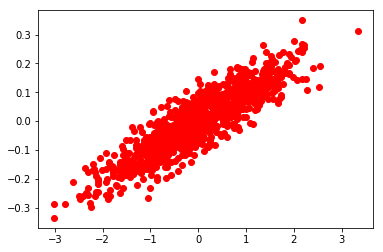

In [16]:
vectors_set = []
for i in range(1000):
    x = np.random.normal(0,1) # 평균=0, 표준편차=1인 정규난수 발생
    y = 0.1 * x + np.random.normal(0,0.05) # y = 0.1 * x + 0.3 + 노이즈
    vectors_set.append([x,y])

x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

plt.plot(x_data, y_data, 'ro')
plt.show()

0 [-0.1299262]
0 0.05350352


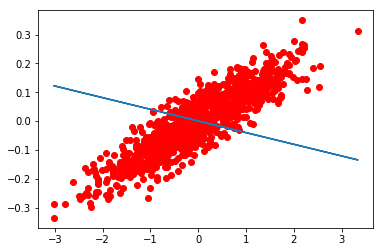

1 [-0.04039976]
1 0.021296486


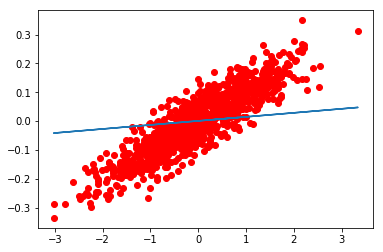

2 [0.01397001]
2 0.009417682


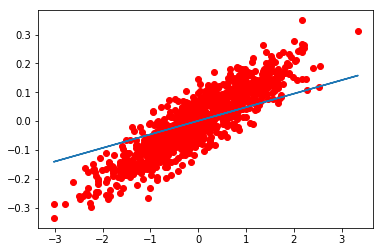

3 [0.04698912]
3 0.0050364067


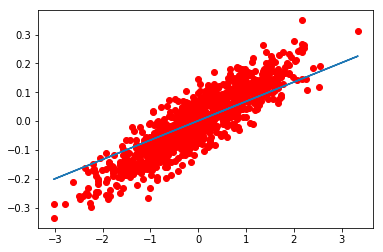

4 [0.06704189]
4 0.0034204335


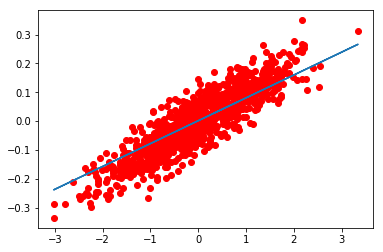

5 [0.07922014]
5 0.002824396


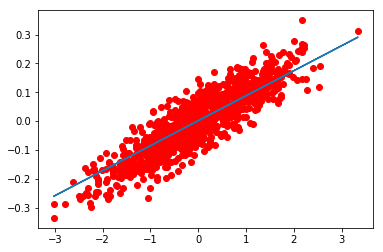

6 [0.08661614]
6 0.0026045514


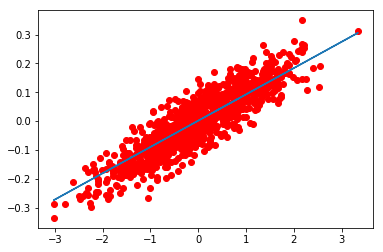

7 [0.09110785]
7 0.0025234611


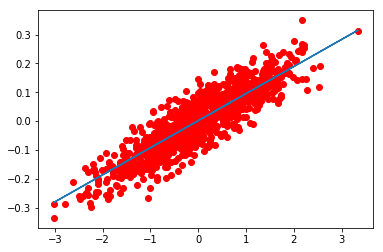

8 [0.09383573]
8 0.002493551


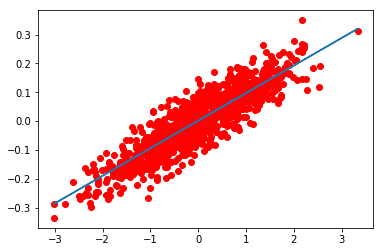

9 [0.09549242]
9 0.002482518


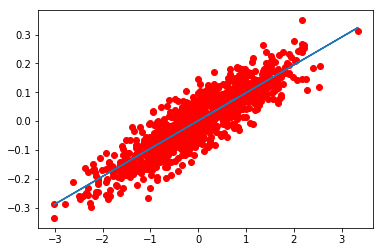

In [17]:
W = tf.Variable(tf.random_uniform([1], -1, 1))  # -1~1의 uniform 분포에서 1개를 random 추출
b = tf.Variable(tf.zeros([1]))  # b=0 가정
Hypothesis = W * x_data + b

cost = tf.reduce_mean(tf.square(Hypothesis - y_data)) # cost 함수 = 오차제곱합의 평균

# optimizer 정의 : learning_rate=0.2인 GradientDescentOptimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.2)

train = optimizer.minimize(cost) # optimizer의 minimize 함수 사용한 train 생성

sess = tf.Session()
sess.run(tf.global_variables_initializer())  # global_variables 초기화

for step in range(10):
    print(step, sess.run(W))
    print(step, sess.run(cost))
    sess.run(train)
    plt.plot(x_data, y_data, 'ro')
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
    plt.show()